### I would like to run through pretty much the same analysis of the cell proflier output but would like to use my NB classifier to parse the data set instead

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

### First thing that I would like to do is check to make sure NB model is working as anticipated

In [2]:
os.chdir(r'C:\Users\LegantLab\Documents\git\tad\Legant_lab\200217_adipogen_zstacks\datases1_and2\dcts_output')

df_whole = pd.read_csv('data_for_nb_training.csv')


'''split the data into train and target sets. In this caes x will be the train data and y will be the target parameter'''
df = df_whole.copy() # make a copy of original df. I am going to alter this a little bit in order to pull out train and test cats

target_cat_name = 'in_object'

'''remove unwanted categories'''
unwanted_cat = ['Unnamed: 0']#, 'ImageNumber', 'ObjectNumber']
df.drop(unwanted_cat, axis = 1, inplace = True)

'''define train and target data'''
x = df.drop('in_object', axis = 1)
y = df[target_cat_name]

'''split data into train and test sets'''
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 42)

'''this is a feature scaling step. This will standardize all of the data in order to pull everything into the same range'''

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

'''set up gaussian naive bayes model and fit it to the data'''
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [3]:
'''make predictions based on the trained data'''
y_pred = model.predict(x_test)


In [4]:
'''double check accuracy and precisiton of model'''
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('accuracy: ', accuracy, ' precision: ', precision)


accuracy:  0.8936170212765957  precision:  0.9122807017543859


### With that all working well I am just going to run through the same training but with all of the data instead of just the training dta

In [5]:
'''This is same as above it just doesn't split data into train and test,'''
df = df_whole.copy() # make a copy of original df. I am going to alter this a little bit in order to pull out train and test cats

target_cat_name = 'in_object'

'''remove unwanted categories'''
unwanted_cat = ['Unnamed: 0']#, 'ImageNumber', 'ObjectNumber']
df.drop(unwanted_cat, axis = 1, inplace = True)

'''define train and target data'''
x_train = df.drop('in_object', axis = 1)
y_train = df[target_cat_name]

#'''split data into train and test sets'''
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 42)




'''this is a feature scaling step. This will standardize all of the data in order to pull everything into the same range'''

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
#x_test = sc_X.transform(x_test)

'''set up gaussian naive bayes model and fit it to the data'''
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### I need to generate the data frames that I would like to use for this analysis first. 

In [23]:
'''this is script that will read in the orignal dataframe. It takes in the orignal .csv file that is the output 
of CellProfiler. It returns two data frames with the time parameter added to each df. It splits the one large 
data frame according to whether or not the data is from the first set of images or the second set of images.
After it adds the appropriate time parameter to each to each df'''

'''change to directory with .csv flie'''
#os.chdir(r'C:\Users\timdaugird\Google Drive\legant_lab\_projects\200217_adipogen_zstacks\cell_profiler_output\dcts_output')

df = pd.read_csv('MyExpt_nuclei.csv') #this the output of cell profiler

'''split data sets'''
df1_ = df.loc[df.ImageNumber <=120]
df2_ = df.loc[df.ImageNumber > 120]

'''list of times associated with each set of images'''
times_lst = [-2, -1, 0, 2/24, 4/24, 6/24, 8/24, 1, 2, 3, 4, 6 ]
times_lst = np.round(times_lst, 3)


'''this is script to add the time parameter to each dataframe.'''

'''start of with the first df'''
img_numb_lst1 = list(range(np.min(df1_.ImageNumber), np.max(df1_.ImageNumber) + 2, 10)) #image numbers on lower and upper bounds for each time


df_lst = [] #list to be populated

for i in range(12):
    df_ = df1_.loc[df1_.ImageNumber >= img_numb_lst1[i]] 
    df_ = df_.loc[df_.ImageNumber < img_numb_lst1[i+1]] #pull out specificed range of images
    df_['time'] = np.zeros(len(df_)) # put in temporary array
    df_.time = df_.time + times_lst[i] #add appropriate time
    df_lst.append(df_) #append to running list
    
df1 = pd.concat(df_lst) #concat all df's into one bit one

'''this is the same thing as the code immediatly above but for the second dataframe'''
img_numb_lst2 = list(range(np.min(df2_.ImageNumber), np.max(df2_.ImageNumber) + 2, 10))
df_lst = []

for i in range(12):
    df_ = df2_.loc[df2_.ImageNumber >= img_numb_lst2[i]]
    df_ = df_.loc[df_.ImageNumber < img_numb_lst2[i+1]] #pull out specificed range of images
    df_['time'] = np.zeros(len(df_)) # put in temporary array
    df_.time = df_.time + times_lst[i]
    df_lst.append(df_)
    
df2 = pd.concat(df_lst)

In [24]:
len(df1)

2808

In [25]:
len(df2)

2733

In [26]:
'''make list of features to be used in classification'''
training_cats = list(df) #list of all of the features in the training df
#training_cats = training_cats[1:-1] #get rid of a couple of unwanted categories this is the unwanted: 1 as well as the in_count features


In [27]:
'''pull the categories out of the df that are used for classifictation'''
x_train_df1 = df1[training_cats]
x_train_df2 = df2[training_cats]

In [28]:
np.array(x_train_df1).shape

(2808, 109)

In [29]:
x_test.shape

(94, 109)

In [30]:
'''this is a feature scaling step. This will standardize all of the data in order to pull everything into the same range'''
sc_X = StandardScaler()
x_train_df1 = sc_X.fit_transform(x_train_df1)
x_train_df2 = sc_X.fit_transform(x_train_df2)


In [35]:
'''add the predictions to the data frame and keep only the predicted in entries'''

df1['in_object'] = model.predict(x_train_df1) # add predictions to the df
df1_nb_parsed = df1.loc[df1.in_object == 1] # keep only the predicted values

df2['in_object'] = model.predict(x_train_df2) 
df2_nb_parsed = df2.loc[df2.in_object == 1]

In [36]:
'''create parsed data frames using original parameters'''
df1_thresh_parsed = df1.loc[df1.AreaShape_Area > 20000]
df1_thresh_parsed = df1_thresh_parsed[df1_thresh_parsed.AreaShape_Eccentricity >= .55]

df2_thresh_parsed = df2.loc[df2.AreaShape_Area > 20000]
df2_thresh_parsed = df2_thresh_parsed[df2_thresh_parsed.AreaShape_Eccentricity >= .55]


In [37]:
len(df1_nb_parsed)

1726

In [38]:
len(df2_nb_parsed)

1695

In [39]:
len(df2_nb_parsed) / len(df2)

0.6201975850713501

In [40]:
len(df2_thresh_parsed) / len(df2)

0.4921331869740212

In [56]:
'''look at how distributions of areas are affected'''

plt.subplot(131)
sns.distplot(df2.AreaShape_Area)
plt.subplot(132)
sns.distplot(df2_thresh_parsed.AreaShape_Area)
plt.subplot(133)
sns.distplot(df2_nb_parsed.AreaShape_Area)

In [57]:
sns.distplot(df2.AreaShape_Area)
sns.distplot(df2_thresh_parsed.AreaShape_Area)
sns.distplot(df2_nb_parsed.AreaShape_Area)
plt.legend(['orig', 'threh', 'nb'])

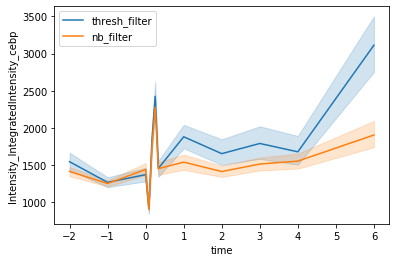

In [41]:
ax = sns.lineplot(df1_thresh_parsed.time, df1_thresh_parsed.Intensity_IntegratedIntensity_cebp)
ax = sns.lineplot(df1_nb_parsed.time, df1_nb_parsed.Intensity_IntegratedIntensity_cebp)

plt.legend(['thresh_filter', 'nb_filter'])
plt.show()

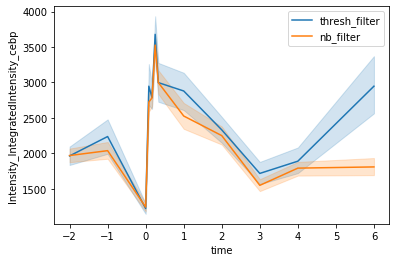

In [42]:
ax = sns.lineplot(df2_thresh_parsed.time, df2_thresh_parsed.Intensity_IntegratedIntensity_cebp)
ax = sns.lineplot(df2_nb_parsed.time, df2_nb_parsed.Intensity_IntegratedIntensity_cebp)

plt.legend(['thresh_filter', 'nb_filter'])
plt.show()

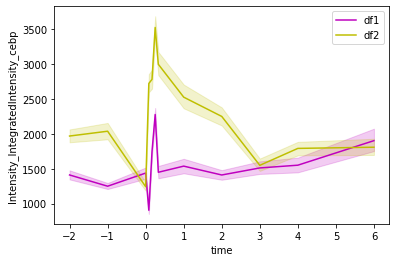

In [43]:
ax = sns.lineplot(df1_nb_parsed.time, df1_nb_parsed.Intensity_IntegratedIntensity_cebp, color = 'm')
ax = sns.lineplot(df2_nb_parsed.time, df2_nb_parsed.Intensity_IntegratedIntensity_cebp, color = 'y')

plt.legend(['df1', 'df2'])
plt.show()

### I am thinking that the above looks pretty okay. I am actually quite happy with it thus far. 

In [44]:
df1_nb_parsed.to_csv('df1_nb_parsed.csv')
df2_nb_parsed.to_csv('df2_nb_parsed.csv')

In [78]:

'''temporary lists to be populated with the number of objects'''
df1_orig_ens = []
df1_ens = []
df2_orig_ens = []
df2_ens = []

'''iterate over the times and figure out how many entries there are for each df at a given time point.'''
for i in np.unique(df1.time):
    '''original df1'''
    df_ = df1.loc[df1.time == i] # pull out single time 
    df1_orig_ens.append(len(df_)) #append list with number of objects at given time point
    
    '''parsed df1'''
    df_ = df1_nb_parsed.loc[df1_nb_parsed.time == i]
    df1_ens.append(len(df_))
    
    '''original df2'''
    df_ = df2.loc[df2.time == i]
    df2_orig_ens.append(len(df_))
    
    '''parsed df2'''
    df_ = df2_nb_parsed.loc[df2_nb_parsed.time == i]
    df2_ens.append(len(df_))
    
df_ens = pd.DataFrame({'time_point' : times_lst,
                     'original_df1_N' : df1_orig_ens,
                     'parsed_df1_N' : df1_ens,
                     'original_df2_N' : df2_orig_ens,
                     'parsed_df2_N' : df2_ens})
    

In [79]:
df_ens

,time_point,original_df1_N,parsed_df1_N,original_df2_N,parsed_df2_N
0,-2.000,221,131,253,131
1,-1.000,230,162,207,162
2,0.000,223,140,226,140
3,0.083,208,131,190,131
4,0.167,239,143,210,143
5,0.250,190,134,236,134
6,0.333,179,121,201,121
7,1.000,220,141,216,141
8,2.000,251,164,230,164
9,3.000,276,181,256,181


In [81]:
sns.violinplot(df2_nb_parsed.time, df2_nb_parsed.AreaShape_Area)

In [82]:
'''make one big df from the df2'''
df2_thresh_parsed['df_id'] = np.zeros(len(df2_thresh_parsed))
df2_nb_parsed['df_id'] = np.ones(len(df2_nb_parsed))

df2_big = pd.concat([df2_thresh_parsed, df2_nb_parsed])


C:\Users\timdaugird\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
sns.boxplot(df2_big.time, df2_big.AreaShape_Area, hue = df2_big.df_id, fliersize = 0)
#plt.legend(['thresh', 'nb'])

In [91]:
sns.lineplot(df2_thresh_parsed.time, df2_thresh_parsed.AreaShape_Area)
sns.lineplot(df2_nb_parsed.time, df2_nb_parsed.AreaShape_Area)
plt.legend(['thresh', 'nb'])